<a href="https://colab.research.google.com/github/tushar8668/Go-digital-assignment/blob/main/Regression_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

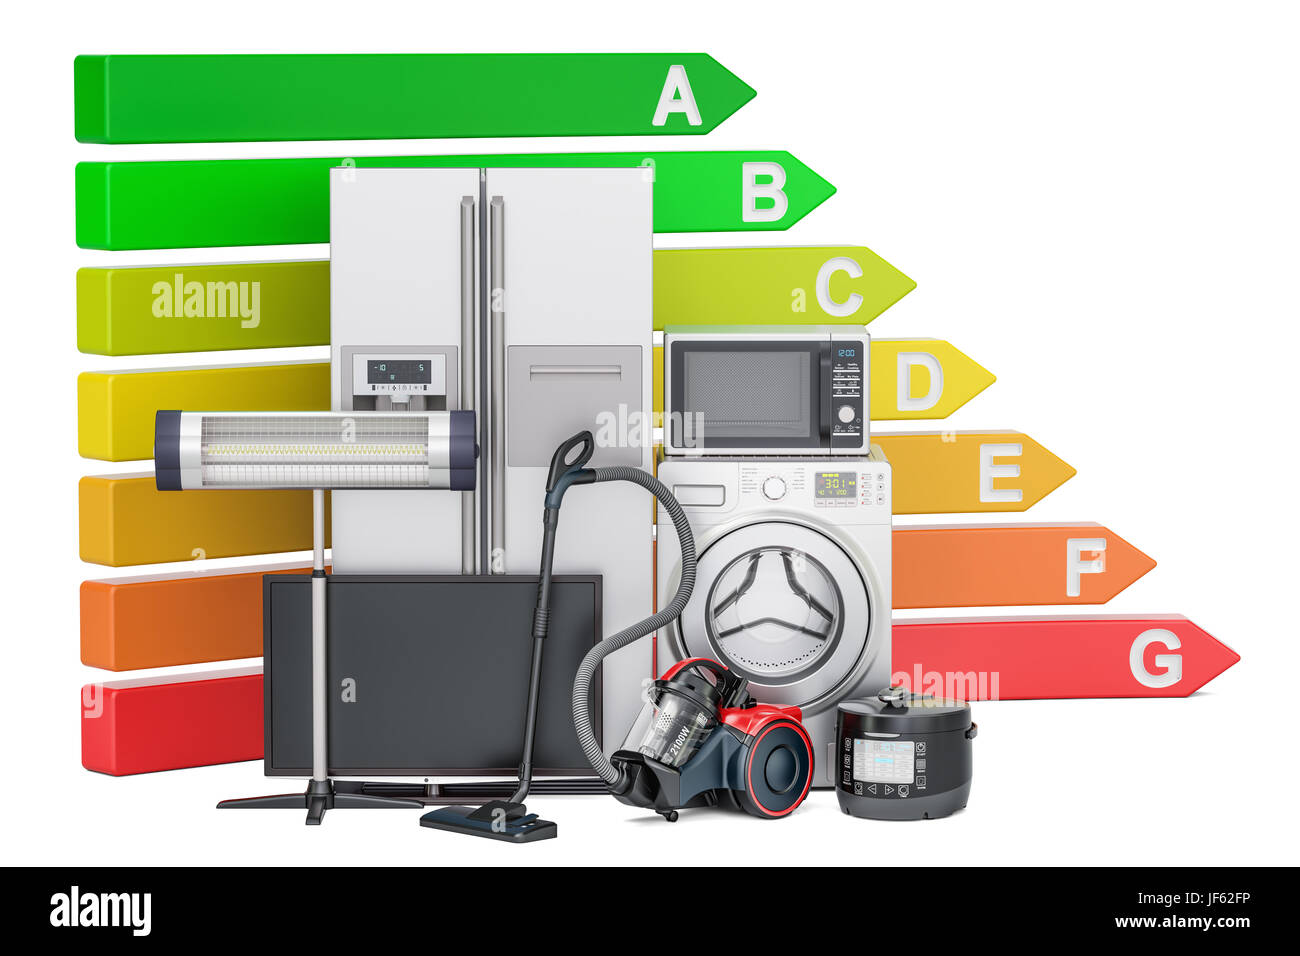
### **Introduction**
The purpose of this research is to forecast the electricity consumption of a particular household in Belgium based on the temperature and humidity levels of various rooms in the facility and surrounding weather information over 4.5 months. The data set runs 4.5 months at 10 minutes. A ZigBee wireless sensor network is being used to monitor the home’s temperature and humidity levels. Around 3.3 minutes, each wireless node sent the temperature and humidity data. The wireless data was then averaged across intervals of 10 minutes. Every 10 minutes, m-bus energy meters collected the energy data. The experimental data sets were combined with the weather data from the closest airport weather station (Chievres Airport, Belgium), which was extracted from a public data set from Reliable Prognosis (rp5.ru). The data set has two random variables to test the regression models and exclude non-predictive characteristics (parameters).

Github link :  [Appliance Energy prediction Regression model](https://)

### **Business Problem Statement**

The increasing trend in energy consumption is becoming cause of concern for the entire world, as the energy consumption is increasing year after year so is the carbon and greenhouse gas emission, the majority portion of the electricity generated is consumed by industrial sector but a considerable amount is also consumed by residential sector.

It is important to study the energy consuming behaviour in the residential sector and predict the energy consumption by home appliances as it consume maximum amount of energy in the residence. This project focuses on predicting the energy consumption of home appliances based on humidity and temperature.

This project aims to predict the energy consumption of home appliances. With the advent of smart homes and the rising need for energy management, existing smart home systems can benefit from accurate prediction. If the energy usage can be predicted for every possible state of appliances, then device control can be optimized for energy savings as well. This is a case of Regression analysis which is part of the Supervised Learning problem. Appliance energy usage is the target variable while sensor data and weather data are the features

### **Project Summary -**

- date time year -  month-day hour:minute:second
- Appliances     -  energy use in Wh
- lights         - energy use of light fixtures in the house in Wh
- T1     - Temperature in kitchen area, in Celsius
- RH_1 - Humidity in kitchen area, in %
- T2 -  Temperature in living room area, in Celsius
- RH_2 -  Humidity in living room area, in %
- T3 - Temperature in laundry room area
- RH_3 - Humidity in laundry room area, in %
- T4 -  Temperature in office room, in Celsius
- RH_4 -  Humidity in office room, in %
- T5 -  Temperature in bathroom, in Celsius
- RH_5 -  Humidity in bathroom, in %
- T6 -  Temperature outside the building (north side), in Celsius
- RH_6 -  Humidity outside the building (north side), in %
- T7 -  Temperature in ironing room , in Celsius
- RH_7 -  Humidity in ironing room, in %
- T8 -  Temperature in teenager room 2, in Celsius
- RH_8 -  Humidity in teenager room 2, in %
- T9 - Temperature in parents room, in Celsius
- RH_9 -  Humidity in parents room, in %
- To - Temperature outside (from Chievres weather station), in Celsius
- Pressure - (from Chievres weather station), in mm Hg
- RH_out Humidity outside (from Chievres weather station) in %
- Wind speed - (from Chievres weather station) -  in m/s
- Visibility - (from Chievres weather station), in km
- Tdewpoint - (from Chievres weather station), Â°C
- rv1 -  Random variable 1, nondimensional
- rv2 -  Random variable 2, nondimensional

### **Import Libraries**

In [ ]:
# Import Important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split


### **Dataset Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset

dataset = pd.read_csv("/content/drive/MyDrive/Datasets/data_application_energy.csv")
dataset.head()

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.columns

### **Data Cleaning**

In [ ]:
# Checking the duplicated entries.

dataset.duplicated().sum()

In [ ]:
# Cheching the null values.

dataset.isna().sum()

### **Exploratory Data Analysis**

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'].info()

In [ ]:
dataset['Appliances'].unique()


In [ ]:

# Create the new Feature HourofDay
dataset['HourofDay'] = dataset['date'].dt.hour
dataset.head(2)

import warnings
warnings.filterwarnings("ignore")


# Check the average energy consumption by hour of the day
plt.figure(figsize = (8,4))
sns.lineplot(x = 'HourofDay' , y = 'Appliances',data=dataset,ci=None)
plt.title('Energy consumption of the Appliance by hour of day')
plt.ylabel('Energy consumption')
plt.xlabel('Hours of the day')
plt.show()



From this plot, we can see that energy consumption tends to be lowest in the early morning hours (around 3-6 AM) and highest in the early evening (6-9 PM). This information could be useful for optimizing energy usage or scheduling tasks around peak energy consumption times.

In [ ]:
# Creat a new feature Weekday which have the days in it.
dataset['Weekday'] = dataset['date'].dt.day_name()

# Check the average energy consumption by weekday
plt.figure(figsize=(8,4))
sns.lineplot(x = 'Weekday' , y = 'Appliances',data=dataset)
plt.ylabel('Energy consumption')
plt.xlabel('Weekdays')
plt.title('Energy consumption of Appliances by Weekdays')
plt.show()

In this plot we see that the energy consumption is highest on monday and Saturday and lowest energy consumption in Tuesday and Thursday.

In [ ]:
# Create another Feature Weekend
dataset['Weekend'] = (dataset['date'].dt.weekday >= 5).astype(int)

# Check the Energy consumption on Weekend.
plt.figure(figsize = (5,4))
sns.barplot(x = 'Weekend', y = 'Appliances' , data = dataset)
plt.ylabel('Energy consumption')
plt.xlabel('Weekend or not')
plt.title("Energy consumption on Weekend")
plt.show()

In this graph we see that energy consumption is slightly higher on weekends that weekdays.

In [ ]:
dataset.head()

In [ ]:
# converts the day of the week as an integer (Monday=0, Sunday=6).
dataset['weekday'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d %H:%M:%S').dt.dayofweek

var = dataset.copy()
feature_var = var.drop(['date','Appliances'],axis=1)
feature_var.head()

In [ ]:
target_var = dataset['Appliances']
target_var.head()

In [ ]:

feature_var.hist(figsize = (12,16))
plt.show()

In [ ]:
# Histogram of the dependent variable

sns.histplot(dataset['Appliances'], kde = True)
plt.title("Distribution of Appliance")
plt.show()

 - Almost all the Tempreture feature are normally distributed.
 - Rh_out feature are negatively skewed and windspeed are positively skewed.
 - Rh_6 has quite different values.
 - And our target variable appliance are also positively skewed.

In [ ]:
# Boxplot for different features

plt.figure(figsize = (15,13))
plt.subplot(2,1,1)
feature_var.iloc[:,:14].boxplot()

plt.subplot(2,1,2)
feature_var.iloc[:,14:].boxplot()
plt.show()


In [ ]:
# Correlation matrix

plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), fmt = ".2f" ,annot = True)
plt.title("Correlation Matrix on Appliance energy dataset")
plt.show()

- Energy consumption has a slight correlation with temperature and a weak correlation with humidity.
- Additionally, we can see that some features are highly correlated with each other.
- Overall, these observations suggest that temperature, humidity, time of day, and weekend are important factors to consider when predicting the energy consumption of the appliances in a house.

In [ ]:
# Plot the scatter plot to check the relationship between independent and dependent variable.

sns.pairplot(dataset, x_vars=["T1", "RH_1", "T2", "RH_2","T3", "RH_3"], y_vars=["Appliances"], height=2, aspect=0.7, kind="reg")
sns.pairplot(dataset, x_vars=["T4", "RH_4","T5", "RH_5", "T6", "RH_6"], y_vars=["Appliances"], height=2, aspect=0.7, kind="reg")
sns.pairplot(dataset, x_vars=["T7", "RH_7", "T8", "RH_8","T9", "RH_9"], y_vars=["Appliances"], height=2, aspect=0.7, kind="reg")
sns.pairplot(dataset, x_vars=[ "T_out", "Press_mm_hg", "RH_out", "Windspeed","Visibility",'HourofDay'], y_vars=["Appliances"], height=2, aspect=0.7, kind="reg")
plt.show()

### **Hypothesis Testing**

### 1. **Is there a correlation between outdoor temperature and energy consumption?**

In [ ]:
# Define the Hypothesis

'''

Null Hypothesis          : There is no correlation between outdoor temperature and energy consumption
Alternative Hypothesis   : There is a correlation between outdoor temperature and energy consumption

'''

# Select the relevant column
outdoor_temp = dataset['T_out']
energy_consumption = dataset['Appliances']

# Calculate the correlation coefficient and p-value
corr, pval = stats.pearsonr(outdoor_temp, energy_consumption)

# Print the results
print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {pval:.3f}")

# Interpret the results
alpha = 0.05
if pval < alpha:
    print("There is sufficient evidences to Reject the null hypothesis. There is correlation between Outdoor Temperature and Energy Consumption.")
else:
    print("There is sufficient evidences to Accept the null hypothesis. There is correlation between Outdoor Temperature and Energy Consumption.")

### 2. **Is there a correlation between outdoor humidity levels and energy consumption?**



In [ ]:
# Define the Hypothesis

'''

Null_Hypothesis         = "There is no correlation between the outdoor humidity level and energy consumption."
Alternative_Hypothesis  = "There is a correlation between the outdoor humidity level and energy consumption."

'''

# Extract the relevant columns from the preprocessed dataset
outdoor_humidity = dataset['RH_out']
energy_consumption = dataset['Appliances']

# Calculate the correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(outdoor_humidity, energy_consumption)

# Print the results
print(f"Correlation Coefficient: {corr_coef}")
print(f"P-Value: {p_value : .2f}")

if p_value < 0.05:
    print(f"There is sufficient evidences to Reject the null hypothesis.ie {Alternative_Hypothesis}")
else:
    print(f"There is sufficient evidences to Rccept the null hypothesis.{Null_Hypothesis}")

###3. **Is there a statistically significant difference in energy consumption between weekdays and weekends**?


In [ ]:
# Define the Hypothesis

'''

Null_Hypothesis = "There is no statistically significant difference between the weekdays and weekends."
Alternative_Hypothesis = "There is statistically significant difference between the weekdays and weekends."

'''


# Seperate out the weekdays and weekends
weekdays = dataset[dataset['Weekend'] == 0]['Appliances']
weekends = dataset[dataset['Weekend'] == 1]['Appliances']


# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(weekdays, weekends)


# Print the results
print(f"t_statistics: {t_statistic}")
print(f"P-Value: {p_value : .2f}")


# Write the result
alpha = 0.05
if p_value < alpha :
  print(f'There is sufficient evidences to Reject the null hypothesis, ie {Alternative_Hypothesis}')
else :
  print(f'There is sufficient evidences to Accept the null hypothesis ie.{Null_Hypothesis}')


In [ ]:
# Handling outliers.

def remove_outliers(dataset, cols):

    """

    Remove outliers from a DataFrame using the interquartile range (IQR) method.

    Parameters:
    data (pandas DataFrame): The DataFrame to remove outliers from.
    cols (list): A list of columns to analyze for outliers.

    Returns:
    pandas DataFrame: The DataFrame with outliers removed.

    """


    # Calculate the IQR for each column
    Q1 = dataset[cols].quantile(0.25)
    Q3 = dataset[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove the outliers from the dataset
    dataset = dataset[~((dataset[cols] < lower_bound) | (dataset[cols] > upper_bound)).any(axis=1)]

    return dataset

# Define the columns to be analyzed for outliers
# cols= ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility']

In [ ]:
# Remove the Highely Correleated features from dataset Ie Remove Multicollinearity.

def remove_high_corr_features(dataset, thresh=0.7):
    corr_matrix = dataset.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
    dataset = dataset.drop(columns=to_drop)
    return dataset


In [ ]:
# Data preprocessing


def label_encode_and_scale(dataset):
    # Saperate out categorical and numerical Features
    numerical_cols = dataset.select_dtypes(include=['float','int']).columns.tolist()
    categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
    # Initialize the LabelEncoder and StandardScaler
    label_encoder = LabelEncoder()
    scaler = StandardScaler()

    # Encode the categorical columns using LabelEncoder
    for col in categorical_cols:
        dataset[col] = label_encoder.fit_transform(dataset[col])

    # Scale the numerical columns using StandardScaler
    dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

    return dataset


In [ ]:
dataset=dataset.drop('date',axis=1)

In [ ]:
# Here we create a pipeline to make data tranform.


# Define the pipeline steps
preprocessing_pipeline = Pipeline(steps = [('remove_outliers', FunctionTransformer(remove_outliers, validate=False, kw_args={'cols': ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility']})),
                                   ('remove_high_corr_features', FunctionTransformer(remove_high_corr_features, validate=False)),
                                   ('label_encode_and_scale', FunctionTransformer(label_encode_and_scale, validate=False))
                                 ])

'''

FunctionTransformer is used to tranform the data into machine learning pipeline using custom function that we define ourself.

'''

pipe = Pipeline(preprocessing_pipeline)
set_config(display="diagram")
pipe


In [ ]:
# Fit and transform the data using the pipeline
transformed = preprocessing_pipeline.fit_transform(dataset)
transformed.head()

## **Model Building**


In [ ]:
# seperate out independent and dependent feature

X = transformed.iloc[:,1:]               # Independent Features
y = transformed['Appliances']            # Dependent Feature




# Split the dataset into training and testing set

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.20 , random_state = 42)


### **Model 1 - Linear Regression**

In [ ]:
# Import the important libraries for machine learning algorithms

from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



# Train and evaluate linear regression model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression : ")
print("Accuracy :",r2_score(y_test,lr_pred))
print('Mean squared error:', lr_mse)


### **Model 2 - Lasso and Ridge Regression**

In [ ]:
# Used the regularization techniques and obseved the accuracy



# L1-Regularization

Lasso_model = Lasso()
Lasso_model.fit(X_train , y_train)
Lasso_pred = Lasso_model.predict(X_test)
Lasso_mse = mean_squared_error(y_test , Lasso_pred)
print("L1_Regularization :")
print("Mean squared error :",(Lasso_mse))
print("Accuracy :",r2_score(y_test,Lasso_pred))

print("------------------------------------------------------------------------")




# L2-Regularization

ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
ridge_pred  = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test , ridge_pred)
print("L2-Regularization :")
print("Mean squared error : ",ridge_mse)
print("Accuracy : ",r2_score(y_test,ridge_pred))

Here the accuracy of by using L2-regularization is quite good so i proceed with this and do the hyperparamter tuning for same.



#### **Hyperparameter tuning - Ridge Regression**

In [ ]:
# Hyperparameter tuning


param_grid = {
                     "alpha"  : [ 0.1, 1.0 ,10 ,100,1000],
                     "solver" : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
             }

grid_search = GridSearchCV(ridge_model,param_grid,cv=5)
grid_search.fit(X_train,y_train)

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:",best_parameters)
print("Best_model :", best_model)

In [ ]:
# Model fitting with best paramters


best_ridge = Ridge(alpha = 100, solver = 'sparse_cg').fit(X_train,y_train)
b_ridge_pred  = best_ridge.predict(X_test)
b_ridge_mse = mean_squared_error(y_test , b_ridge_pred)

print("L2-Regularization :")
print("Mean squared error : ",ridge_mse)
print("Accuracy : ",r2_score(y_test,ridge_pred))
print("  ")
print("---------------------------------------------")
print("  ")
print("L2-Regularization with best parameters :")
print("Mean squared error : ",b_ridge_mse)
print("Accuracy : ",r2_score(y_test,b_ridge_pred))

### **Model 3 - XGBoost Regressor**

In [ ]:
# Train and evaluate decision tree regression model


xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)


#### **Hyperparameter tuning - XGBoost Regressor**

In [ ]:
# Set the hyperparameter

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    }

random_search = RandomizedSearchCV(xgb_model,param_grid,cv=3, n_iter=100).fit(X_train,y_train)
print("Best Parameter :",random_search.best_params_)
print("Best model :",random_search.best_estimator_)

In [ ]:
# Model fitting with best paramters

best_xgb = XGBRegressor(n_estimators = 300, max_depth= 7, learning_rate= 0.1).fit(X_train,y_train)
b_xgb_pred  = best_xgb.predict(X_test)
b_xgb_mse = mean_squared_error(y_test , b_xgb_pred)


print("XGBoost Regressor: ")
print("Accuracy :",r2_score(y_test,xgb_pred))
print('Mean squared error:', xgb_mse)
print(" ")
print("------------------------------------------------")
print(" ")
print("XGBoost Regressor with best parameters :")
print("Accuracy : ",r2_score(y_test,b_xgb_pred))
print("Mean squared error : ",b_xgb_mse)


### **Model 4 - Random Forest**

In [ ]:
# Train and evaluate random forest regression model

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

#### **Hyperparameter tuning - Random Forest**

In [ ]:
# Set the hyperparameter

param_grid = {
    'max_depth': [20, 30, 40],
    'min_samples_split': [4, 6, 10],
    'min_samples_leaf': [4, 6, 10]
            }


random_search = RandomizedSearchCV(rf_model,param_grid ,cv=3, n_iter=100).fit(X_train,y_train)
print("Best Parameter :",random_search.best_params_)
print("Best model :",random_search.best_estimator_)

In [ ]:
# Model fitting with best paramters

best_rf = RandomForestRegressor(min_samples_split = 4, min_samples_leaf = 4, max_depth = 30 , random_state = 42).fit(X_train,y_train)
b_rf_pred  = best_rf.predict(X_test)
b_rf_mse = mean_squared_error(y_test , b_rf_pred)


print("Random Forest :")
print("Accuracy :",r2_score(y_test,rf_pred))
print('Random forest regression mean squared error:', rf_mse)
print(" ")
print("----------------------------------------------------------")
print(" ")
print("Random Forest Regressor with best parameters :")
print("Accuracy : ",r2_score(y_test,b_rf_pred))
print("Mean squared error : ",b_rf_mse)




In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train and evaluate random Gradient boosting regression model

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)

In [ ]:
# Find the best parameter

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV object

random_search = RandomizedSearchCV(gb_model, param_grid, cv=3, n_jobs=-1, verbose=2).fit(X_train,y_train)
print("Best Parameter :",random_search.best_params_)
print("Best model :",random_search.best_estimator_)

In [ ]:
# Model fitting with best paramters

best_gb = GradientBoostingRegressor(max_depth=5, n_estimators=300, learning_rate=0.1, random_state=42).fit(X_train,y_train)
b_gb_pred  = best_gb.predict(X_test)
b_gb_mse = mean_squared_error(y_test , b_gb_pred)


print("Gradient Boost Regressor :")
print("Accuracy :",r2_score(y_test,gb_pred))
print('Random forest regression mean squared error:', gb_mse)
print(" ")
print("---------------------------------------------------------")
print(" ")
print("Gradient Boost Regressor with best parameters :")
print("Accuracy : ",r2_score(y_test,b_gb_pred))
print("Mean squared error : ",b_gb_mse)


### **Which model you choose and why ?**

  I chose a random forest model because it is a powerful and versatile  machine learning algorithm that is well-suited for a variety of tasks, including classification and regression. Random forests are also relatively easy to interpret and robust to noise and outliers in the data.

  In my project, the random forest model achieved an highest accuracy of 65% and an MSE of 35%. These are both good results, but there is always room for improvement. I plan to perform some *feature* engineering to see if I can create new features that are more informative for the machine learning algorithm.

### **Future work**

1.  **Save the best performing ml model in a pickle file or joblib file format for deployment process.**





In [ ]:
# Save the File

import joblib

joblib.dump(rf_model, 'random_forest_regressor.joblib')


2. **Again Load the saved model file and try to predict unseen data for a sanity check.**

In [ ]:
# loading saved model File
model = joblib.load('random_forest_regressor.joblib')

In [ ]:
# Load the File and predict unseen data.
data = transformed[["lights","T1","RH_1","RH_5","RH_6","Press_mm_hg","RH_out","Windspeed","Visibility","rv1","HourofDay","Weekday","Weekend"]]


In [ ]:
# Make predictions using the loaded Random Forest model
predictions = model.predict(data)

# Print the predictions
print(predictions)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


In this project, we tested a variety of machine learning algorithms for predicting appliance energy consumption. I used a different features, including sensor data, weather data, and appliance state data, to train the model. I found that random forest regression models achieved the highest accuracy.

    We can use this model to predict the energy consumption of appliances in a variety of ways.

For example, we can use it to:

- Identify energy - efficient appliances and settings.
- Develop smart home energy management systems that can optimize appliance usage to reduce energy costs.
- Detect anomalous energy consumption patterns that may indicate a problem with an appliance or the electrical system.

For example, we could use the model to predict the energy consumption of a refrigerator over the next 24 hours. This information could be used to develop a smart home energy management system that would automatically turn off the refrigerator if there is no one home and the temperature inside the refrigerator is above a certain threshold.

We could also use the model to identify appliances that are consuming more energy than expected. This information could be used to troubleshoot problems with appliances or to identify areas where energy consumption can be reduced.

Overall, this project demonstrates the feasibility of using random forest models to predict appliance energy consumption. The model we developed achieved a good performance on the test set, and it can be used in a variety of ways to reduce energy consumption and save money.

#### **Recommendations**

    There are a few things that could be done to improve the model and its performance:

   - Collect more data, especially for appliances that are used less frequently.
   - Engineer new features that may be predictive of appliance energy
     consumption.
   - Deploy the model in a real-world setting to validate its performance and identify any areas for improvement.


   We believe that this project has the potential to make a significant contribution to the field of energy efficiency. By developing accurate and reliable models for predicting appliance energy consumption, we can help people to save money and reduce their environmental impact.

Specifically, the dataset you used in this project is well-suited for random forests, as it contains a variety of features, including sensor data, weather data, and appliance state data. Random forests can learn complex relationships between the different features, and they are known for their robustness to noise and outliers.

Overall, the results of my project are promising and suggest that random forests can be used to develop accurate and reliable models for predicting appliance energy consumption.

### **Benefits of Appliance Energy Prediction**


An appliance energy prediction project can be helpful for society in a number of ways, including:

*   **Reducing energy consumption** : By predicting appliance energy consumption,consumers can make informed decisions about how to use their appliances in a more energy-efficient way. For example, if a consumer knows that their washing machine is going to use a lot of energy at a certain time,  they can choose to run it at a different time or on a different day.


*  **Saving money on energy bills** : By using their appliances more efficiently, consumers can save money on their energy bills. This is especially important for low-income households, which often spend a disproportionate amount of their income on energy costs.

*  **Improving grid stability** : By predicting appliance energy consumption, utilities can better manage the grid and prevent outages. This is important because outages can be disruptive and costly for businesses and consumers.


Overall, appliance energy prediction projects have the potential to make a significant positive impact on society. By reducing energy consumption, and energy bills, appliance energy prediction projects can help to create a more sustainable and equitable future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***